## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset
combined_metdata= pd.merge(mouse_metadata,study_results, how = 'outer', on = 'Mouse ID')
combined_metdata
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
Unique_mouseid= combined_metdata['Mouse ID'].unique()
Unique_mouseid
len(Unique_mouseid)



249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_mouse= combined_metdata.loc[combined_metdata.duplicated(subset =['Mouse ID', 'Timepoint'], keep=False), ['Mouse ID', 'Timepoint']]

#duplicates_mouse.count()
duplicates_mouse

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mouse= combined_metdata.loc[combined_metdata.duplicated(subset =['Mouse ID', 'Timepoint'], keep=False), combined_metdata.columns]
duplicates_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaning_data= combined_metdata[combined_metdata['Mouse ID'] != 'g989']
cleaning_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
final_mouseid= cleaning_data['Mouse ID'].unique()
final_mouseid
len(final_mouseid)


248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stattistic_mean = cleaning_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
stattistic_median = cleaning_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
stattistic_var = cleaning_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stattistic_stdev= cleaning_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
stattistic_sem= cleaning_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_drug= pd.DataFrame ({'Mean':stattistic_mean, 
               "Median":stattistic_median,
                'var': stattistic_var,
               'Stdev':stattistic_stdev, 
                'SEM': stattistic_sem,
                'SEM': stattistic_sem})
#summary_drug = pd.DataFrame(data =summary_drug )
            
summary_drug


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,var,Stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaning_data.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
cleaning_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#cleaning_data.plot(kind='bar')


Text(0, 0.5, 'Number of Mice')

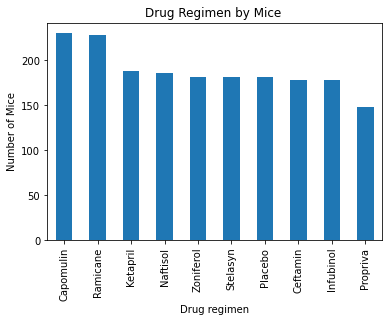

In [15]:
#getting the bar chart 
cleaning_data['Drug Regimen'].value_counts().plot(kind='bar')
plt.title('Drug Regimen by Mice ')
plt.xlabel('Drug regimen')
plt.ylabel('Number of Mice')

In [16]:
x_values = cleaning_data['Drug Regimen'].value_counts().index
y_values= cleaning_data['Drug Regimen'].value_counts().values

Text(0, 0.5, 'Number of Mice')

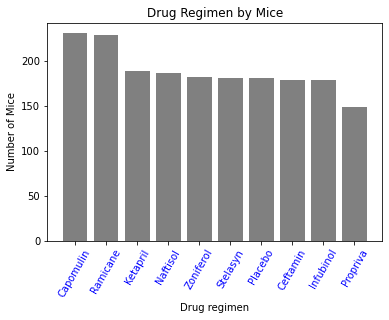

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(x_values,y_values, color = 'grey')
plt.xticks(rotation = 60, color = "blue")
plt.title('Drug Regimen by Mice')
plt.xlabel('Drug regimen')
plt.ylabel('Number of Mice')

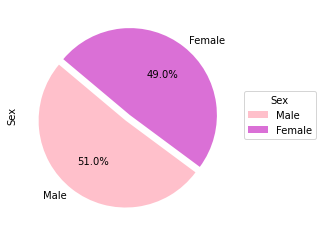

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.08, 0)
y=cleaning_data['Sex'].value_counts()
y.plot(kind='pie', startangle= 140, colors = ["pink", 'orchid'], explode =explode, subplots=True, autopct='%1.1f%%')
plt.legend(title="Sex",loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#cleaning_data.head()

In [19]:
y

Male      958
Female    922
Name: Sex, dtype: int64

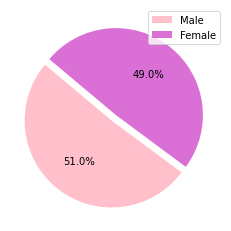

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.08, 0)
y = cleaning_data['Sex'].value_counts()

plt.pie(y, autopct= '%1.1f%%', startangle = 140, colors = ["pink", 'orchid'], explode= explode)
plt.legend(y.index)
plt.show() 



## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtering= cleaning_data[cleaning_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Start by getting the last (greatest) timepoint for each mouse
filtering= filtering.groupby(['Drug Regimen','Mouse ID']).last()[['Timepoint','Tumor Volume (mm3)']]
filtering = filtering.reset_index().sort_values(['Timepoint'], ascending = 'True')
filtering.style.format({'Tumor Volume (mm3)':'{:.2f}'})
filtering
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
26,Ceftamin,b447,0,45.000000
41,Ceftamin,t573,0,45.000000
43,Ceftamin,u153,0,45.000000
45,Ceftamin,x226,0,45.000000
97,Ramicane,w678,5,43.166373
...,...,...,...,...
32,Ceftamin,k210,45,68.923185
31,Ceftamin,j296,45,61.849023
25,Ceftamin,a275,45,62.999356
39,Ceftamin,p438,45,61.433892


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
drugs= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
fill_list= []
#getting ready the loop
for x in drugs:
    fill_list_vol= filtering.loc[filtering['Drug Regimen']==x, 'Tumor Volume (mm3)']
    fill_list.append(fill_list_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles= fill_list_vol.quantile([0.25, 0.5, 0.75])
    lower_q= quartiles[0.25]
    upper_q= quartiles[0.75]
    mean = fill_list_vol.mean()
    iqr = upper_q-lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    
    #getting the outliers
    outliers = fill_list_vol.loc[(fill_list_vol< lower_bound)| (fill_list_vol>upper_bound)]
    
    #Printing the results
    print (f'{x} Regimen')
    print(f'Average Tummor Volume (mm3) for {x} is: {round(mean, 2)}')
    print(f'Final Tummor Volume (mm3) IQR for {x} is: {round(iqr, 2)}')
    print(f'Final Tummor Volume (mm3) IQR for {x} below {round(lower_bound, 2)} potential outliers.')
    print(f'Final Tummor Volume (mm3) IQR for {x} below {round(upper_bound, 2)} potential outliers.')
    print(f'Number of outlier for {x} is: {outliers.count()}')
    if outliers.count()>0:
         for j in outliers.index:
                print(f'Final Outlier in Tummor Volume (mmm3) is {round(outliers[j],2)}')
    print(f'----------------------------------------------------------------------')
    


Capomulin Regimen
Average Tummor Volume (mm3) for Capomulin is: 36.67
Final Tummor Volume (mm3) IQR for Capomulin is: 7.78
Final Tummor Volume (mm3) IQR for Capomulin below 20.7 potential outliers.
Final Tummor Volume (mm3) IQR for Capomulin below 51.83 potential outliers.
Number of outlier for Capomulin is: 0
----------------------------------------------------------------------
Ramicane Regimen
Average Tummor Volume (mm3) for Ramicane is: 36.19
Final Tummor Volume (mm3) IQR for Ramicane is: 9.1
Final Tummor Volume (mm3) IQR for Ramicane below 17.91 potential outliers.
Final Tummor Volume (mm3) IQR for Ramicane below 54.31 potential outliers.
Number of outlier for Ramicane is: 0
----------------------------------------------------------------------
Infubinol Regimen
Average Tummor Volume (mm3) for Infubinol is: 58.18
Final Tummor Volume (mm3) IQR for Infubinol is: 11.48
Final Tummor Volume (mm3) IQR for Infubinol below 36.83 potential outliers.
Final Tummor Volume (mm3) IQR for Infubi

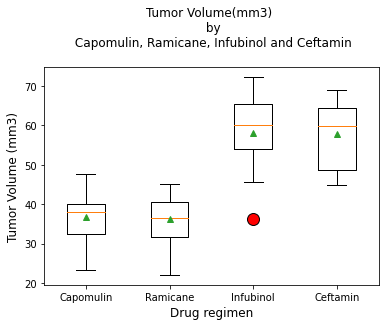

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fg1, plot = plt.subplots()
makeup= dict(marker ='o', markerfacecolor= 'red', markersize = 12)
plot.boxplot(fill_list, labels= drugs, flierprops= makeup, showmeans= True)
plot.set_title('Tumor Volume(mm3) \n by\n Capomulin, Ramicane, Infubinol and Ceftamin\n', fontsize= 12)
plot.set_xlabel('Drug regimen', fontsize = 12)
plot.set_ylabel('Tumor Volume (mm3)', fontsize= 12)
plt.show()


## Line and Scatter Plots

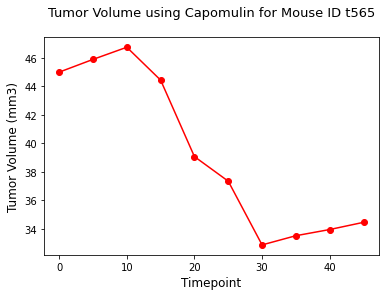

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_df= cleaning_data.loc[cleaning_data['Drug Regimen'] =="Capomulin"]

#getting the one mouse
mouse = 't565'
mouse_df = drug_df.loc[drug_df['Mouse ID']== mouse]

#line plot
line_df= plt.plot(mouse_df['Timepoint'], mouse_df["Tumor Volume (mm3)"], marker ='o', color = 'red')

#getting th axis 
plt.title(f'Tumor Volume using Capomulin for Mouse ID {mouse}\n', fontsize = 13)
plt.xlabel('Timepoint', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize =12)
plt.show()

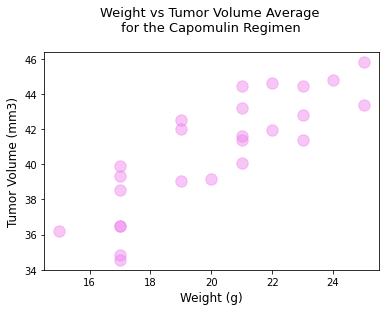

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#mouse_avg
avg_mouse = drug_df.groupby(['Mouse ID']).mean()[['Weight (g)', 'Tumor Volume (mm3)']]
plt.scatter (avg_mouse['Weight (g)'], avg_mouse['Tumor Volume (mm3)'], color = 'violet', s = 130, alpha= 0.450)
plt.title(f'Weight vs Tumor Volume Average \n for the Capomulin Regimen \n', fontsize=13)
plt.xlabel('Weight (g)', fontsize= 12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)
plt.show()

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(malic_acid,flavanoids)[0],2)}")

avg_weight = avg_mouse['Weight (g)']
avg_tumor = avg_mouse['Tumor Volume (mm3)']

print(f'The correlation coefficient between weight and Tumor volume is {round(st.pearsonr(avg_weight,avg_tumor)[0],2)}')


The correlation coefficient between weight and Tumor volume is 0.84


In [43]:
#Regression
# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor)
# y = mx + b
regression_value = avg_weight * slope + intercept
formula = 'y = ' + str(round(slope,2)) + 'x + ' +str(round(intercept,2))
#formula

rsquare = round(rvalue**2,2)
print (f'R square : {rsquare}')
print (f'Slope: {round(slope,2)}') 
print (f'Intercept: {round(intercept,2)}')
print (f'Standard Error: {stderr}')


R square : 0.71
Slope: 0.95
Intercept: 21.55
Standard Error: 0.1275435903320134


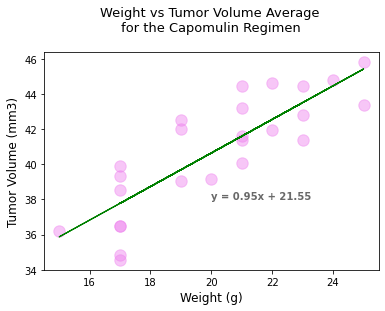

In [48]:
avg_mouse = drug_df.groupby(['Mouse ID']).mean()[['Weight (g)', 'Tumor Volume (mm3)']]
plt.scatter (avg_mouse['Weight (g)'], avg_mouse['Tumor Volume (mm3)'], color = 'violet', s = 130, alpha= 0.450)
plt.title(f'Weight vs Tumor Volume Average \n for the Capomulin Regimen \n', fontsize=13)
plt.xlabel('Weight (g)', fontsize= 12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

plt.plot(avg_mouse['Weight (g)'],regression_value, 'r-',linewidth =1.2, color = 'green')
plt.annotate(formula, (20,38), fontsize = 10 , color = 'dimgray',fontweight = 'bold')
plt.show()